In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("C:/Project/Electricity_project/RawData/GlobalEYUtility_Final_for Demo.csv")
df.head()

,abin,Feeder_Category,BREAKER_MAKE,UpcaseRoadTraffic,Upcase_DepthOfCable,Upcase_SoilCondition,Upcase_LeadExposed,Upcase_ArmourCableCondition,CABLE_SIZE,NO__OF_PARALLEL_RUNNING_CABLES,FaultCurrent_Count,_5Yr_Faults_Count,No_of_Load_transfer_Operations,No_of_Times_Exceeded100_,No_of_times_exceeded_60_,No_of_time_below_60_,No_of_Times_Exceeded90_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,Number_OF_Cables,PILC,XLPE,DATE_ONLY,DAY_OF_WEEK,WEEKEND_Y_N_,Average_Current,MORNING_AVG_CURRENT,AFTERNOON_AVG_CURRENT,EVENING_AVG_CURRENT,Peak_Current,Peak_Slab,Average_voltage,MORNING_AVG_VOLTAGE,AFTERNOON_AVG_VOLTAGE,EVENING_AVG_VOLTAGE,Peak_Voltage,target,Avg_Heat_Index,Morning_AVG_Heat_Index,Afternoon_AVG_Heat_Index,Evening_Avg_Heat_Index,Peak_HI,Avg_humidity,Morning_AVG_humidity,Afternoon_AVG_HUMIDITY,Evening_Avg_HUMIDITY,Max_Humidity,Avg_TEMP,Morning_AVG_TEMP,Afternoon_AVG_TEMP,Evening_Avg_TEMP,Max_TEMP,IR_Value_After_JointingPHASE_TO,MORNING_AVG_CURRENT_N_1,MORNING_AVG_CURRENT_N_2,AFTERNOON_AVG_CURRENT_N_1,AFTERNOON_AVG_CURRENT_N_2,EVENING_AVG_CURRENT_N_1,EVENING_AVG_CURRENT_N_2,MORNING_AVG_VOLTAGE_N_1,MORNING_AVG_VOLTAGE_N_2,AFTERNOON_AVG_VOLTAGE_N_1,AFTERNOON_AVG_VOLTAGE_N_2,EVENING_AVG_VOLTAGE_N_1,EVENING_AVG_VOLTAGE_N_2,TARGET_N_1,TARGET_N_2,AVERAGE_CURRENT_N_1,AVERAGE_CURRENT_N_2,AVERAGE_VOLTAGE_N_1,AVERAGE_VOLTAGE_N_2,AVERAGE_HEAT_INDEX_N_1,AVERAGE_HEAT_INDEX_N_2,AVERAGE_HUMUDITY_N_1,AVERAGE_HUMUDITY_N_2,AVERAGE_TEMP_N_1,AVERAGE_TEMP_N_2,MORNING_AVG_HEAT_INDEX_N_1,MORNING_AVG_HEAT_INDEX_N_2,AFTERNOON_AVG_HEAT_INDEX_N_1,AFTERNOON_AVG_HEAT_INDEX_N_2,EVENING_AVG_HEAT_INDEX_N_1,EVENING_AVG_HEAT_INDEX_N_2,MORNING_AVG_HUMUDITY_N_1,MORNING_AVG_HUMUDITY_N_2,AFTERNOON_AVG_HUMUDITY_N_1,AFTERNOON_AVG_HUMUDITY_N_2,EVENING_AVG_HUMUDITY_N_1,EVENING_AVG_HUMUDITY_N_2,MORNING_AVG_TEMP_N_1,MORNING_AVG_TEMP_N_2,AFTERNOON_AVG_TEMP_N_1,AFTERNOON_AVG_TEMP_N_2,EVENING_AVG_TEMP_N_1,EVENING_AVG_TEMP_N_2,Peak_Current_N_1,Peak_Current_N_2,Peak_Current_Time_N_1,Peak_Current_Time_N_2,Peak_Current_Slab_N_1,Peak_Current_Slab_N_2,New_PublicHoliday,New_Summer,New_Monsoon,New_Winter,_dataobs_,Feeder,Switch,Section Id,Pathid,Path Order,Lat,Long,Customer At Risk,Revenue At Rsik,Assets At Risk,Risk Type,NoFaultsSince2016
0,ED,RES,SIEMENS VCB,MODERATE,NORMAL,DRY,NO,STRONG,120.0,3.0,2.0,5.0,0.0,0.0,0.0,96.0,0.0,586.6,7.0,36.0,2.0,1.0,1.0,08-01-2016,6.0,N,4.352917,9.688485,1.55125,1.565161,43.99,M,11.047187,11.035455,11.026250,11.081290,11.20,1.0,26.667515,23.993545,28.256467,27.873791,31.224829,60.078646,70.946061,48.330312,60.637419,79.34,25.887917,22.996970,27.952188,26.834516,31.11,250.0,68.730303,19.471818,108.005000,20.005000,107.405161,21.148710,11.035455,10.961818,11.026250,11.001875,11.081290,10.954839,0.0,0.0,94.310625,20.191042,11.047187,10.972917,26.667515,26.667515,60.078646,60.078646,25.887917,25.887917,23.993545,23.993545,28.256467,28.256467,27.873791,27.873791,70.946061,70.946061,48.330312,48.330312,60.637419,60.637419,22.996970,22.996970,27.952188,27.952188,26.834516,26.834516,1.5,9.08,0.0,0.0,M,M,N,N,N,Y,379.0,30462.0,10499.0,30462-10499-1,SANTACRUZ RECEIVING STATION-ANAND NAGAR NO.2 S...,2.0,19.080542,72.845893,8000.0,97.0,10.0,Low,0.0
1,ED,RES,ABB SF6,HEAVY,NORMAL,MOIST,NO,STRONG,300.0,1.0,7.0,2.0,0.0,0.0,0.0,96.0,0.0,533.1,5.0,NaN,1.0,0.0,1.0,15-01-2016,6.0,N,4.416875,12.658182,0.10000,0.100000,19.24,M,11.021667,10.977576,11.050000,11.039355,11.27,1.0,24.975674,22.618742,26.488964,25.922561,28.202562,69.590937,74.704545,63.073125,70.875484,76.92,23.927083,21.308182,25.579687,25.009032,27.30,350.0,58.424242,34.783333,79.528125,53.851250,88.881613,52.395484,10.977576,10.977576,11.050000,11.050000,11.039355,11.039355,0.0,0.0,75.294062,46.826563,11.021667,11.021667,24.975674,24.975674,69.590937,69.590937,23.927083,23.927083,22.618742,22.618742,26.488964,26.488964,25.922561,25.922561,74.704545,74.704545,63.073125,63.073125,70.875484,70.875484,21.308182,21.308182,25.579687,25.579687,25.009032,25.009032,0.1,18.46,0.0,0.0,M,M,N,N,N,Y,705.0,30462.0,10499.0

In [3]:
df = df[:300]
df.shape

(300, 119)

In [4]:
df.target.value_counts()

target
1.0    174
0.0    126
Name: count, dtype: int64

In [5]:
df.target.value_counts(normalize=True)

target
1.0    0.58
0.0    0.42
Name: proportion, dtype: float64

In [6]:
try:
    df.drop(columns=['No_of_Times_Exceeded100_',
                    'No_of_Times_Exceeded90_',
                    'Peak_Slab',
                     'IR_Value_After_JointingPHASE_TO',
                     'New_Winter','_dataobs_',
                     'Feeder',
                     'Switch',
                     'Section Id',
                     'Pathid',
                    'Path Order',
                     'Lat',
                     'Long',
                     'Customer At Risk',
                     'Revenue At Rsik',
                     'Assets At Risk',
                     'Risk Type',
                     'NoFaultsSince2016'], inplace=True)
    print("Deleted successfully")
except Exception as e:
    print(e)

Deleted successfully


In [7]:
df.head()

,abin,Feeder_Category,BREAKER_MAKE,UpcaseRoadTraffic,Upcase_DepthOfCable,Upcase_SoilCondition,Upcase_LeadExposed,Upcase_ArmourCableCondition,CABLE_SIZE,NO__OF_PARALLEL_RUNNING_CABLES,FaultCurrent_Count,_5Yr_Faults_Count,No_of_Load_transfer_Operations,No_of_times_exceeded_60_,No_of_time_below_60_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,Number_OF_Cables,PILC,XLPE,DATE_ONLY,DAY_OF_WEEK,WEEKEND_Y_N_,Average_Current,MORNING_AVG_CURRENT,AFTERNOON_AVG_CURRENT,EVENING_AVG_CURRENT,Peak_Current,Average_voltage,MORNING_AVG_VOLTAGE,AFTERNOON_AVG_VOLTAGE,EVENING_AVG_VOLTAGE,Peak_Voltage,target,Avg_Heat_Index,Morning_AVG_Heat_Index,Afternoon_AVG_Heat_Index,Evening_Avg_Heat_Index,Peak_HI,Avg_humidity,Morning_AVG_humidity,Afternoon_AVG_HUMIDITY,Evening_Avg_HUMIDITY,Max_Humidity,Avg_TEMP,Morning_AVG_TEMP,Afternoon_AVG_TEMP,Evening_Avg_TEMP,Max_TEMP,MORNING_AVG_CURRENT_N_1,MORNING_AVG_CURRENT_N_2,AFTERNOON_AVG_CURRENT_N_1,AFTERNOON_AVG_CURRENT_N_2,EVENING_AVG_CURRENT_N_1,EVENING_AVG_CURRENT_N_2,MORNING_AVG_VOLTAGE_N_1,MORNING_AVG_VOLTAGE_N_2,AFTERNOON_AVG_VOLTAGE_N_1,AFTERNOON_AVG_VOLTAGE_N_2,EVENING_AVG_VOLTAGE_N_1,EVENING_AVG_VOLTAGE_N_2,TARGET_N_1,TARGET_N_2,AVERAGE_CURRENT_N_1,AVERAGE_CURRENT_N_2,AVERAGE_VOLTAGE_N_1,AVERAGE_VOLTAGE_N_2,AVERAGE_HEAT_INDEX_N_1,AVERAGE_HEAT_INDEX_N_2,AVERAGE_HUMUDITY_N_1,AVERAGE_HUMUDITY_N_2,AVERAGE_TEMP_N_1,AVERAGE_TEMP_N_2,MORNING_AVG_HEAT_INDEX_N_1,MORNING_AVG_HEAT_INDEX_N_2,AFTERNOON_AVG_HEAT_INDEX_N_1,AFTERNOON_AVG_HEAT_INDEX_N_2,EVENING_AVG_HEAT_INDEX_N_1,EVENING_AVG_HEAT_INDEX_N_2,MORNING_AVG_HUMUDITY_N_1,MORNING_AVG_HUMUDITY_N_2,AFTERNOON_AVG_HUMUDITY_N_1,AFTERNOON_AVG_HUMUDITY_N_2,EVENING_AVG_HUMUDITY_N_1,EVENING_AVG_HUMUDITY_N_2,MORNING_AVG_TEMP_N_1,MORNING_AVG_TEMP_N_2,AFTERNOON_AVG_TEMP_N_1,AFTERNOON_AVG_TEMP_N_2,EVENING_AVG_TEMP_N_1,EVENING_AVG_TEMP_N_2,Peak_Current_N_1,Peak_Current_N_2,Peak_Current_Time_N_1,Peak_Current_Time_N_2,Peak_Current_Slab_N_1,Peak_Current_Slab_N_2,New_PublicHoliday,New_Summer,New_Monsoon
0,ED,RES,SIEMENS VCB,MODERATE,NORMAL,DRY,NO,STRONG,120.0,3.0,2.0,5.0,0.0,0.0,96.0,586.6,7.0,36.0,2.0,1.0,1.0,08-01-2016,6.0,N,4.352917,9.688485,1.55125,1.565161,43.99,11.047187,11.035455,11.026250,11.081290,11.20,1.0,26.667515,23.993545,28.256467,27.873791,31.224829,60.078646,70.946061,48.330312,60.637419,79.34,25.887917,22.996970,27.952188,26.834516,31.11,68.730303,19.471818,108.005000,20.005000,107.405161,21.148710,11.035455,10.961818,11.026250,11.001875,11.081290,10.954839,0.0,0.0,94.310625,20.191042,11.047187,10.972917,26.667515,26.667515,60.078646,60.078646,25.887917,25.887917,23.993545,23.993545,28.256467,28.256467,27.873791,27.873791,70.946061,70.946061,48.330312,48.330312,60.637419,60.637419,22.996970,22.996970,27.952188,27.952188,26.834516,26.834516,1.5,9.08,0.0,0.0,M,M,N,N,N
1,ED,RES,ABB SF6,HEAVY,NORMAL,MOIST,NO,STRONG,300.0,1.0,7.0,2.0,0.0,0.0,96.0,533.1,5.0,NaN,1.0,0.0,1.0,15-01-2016,6.0,N,4.416875,12.658182,0.10000,0.100000,19.24,11.021667,10.977576,11.050000,11.039355,11.27,1.0,24.975674,22.618742,26.488964,25.922561,28.202562,69.590937,74.704545,63.073125,70.875484,76.92,23.927083,21.308182,25.579687,25.009032,27.30,58.424242,34.783333,79.528125,53.851250,88.881613,52.395484,10.977576,10.977576,11.050000,11.050000,11.039355,11.039355,0.0,0.0,75.294062,46.826563,11.021667,11.021667,24.975674,24.975674,69.590937,69.590937,23.927083,23.927083,22.618742,22.618742,26.488964,26.488964,25.922561,25.922561,74.704545,74.704545,63.073125,63.073125,70.875484,70.875484,21.308182,21.308182,25.579687,25.579687,25.009032,25.009032,0.1,18.46,0.0,0.0,M,M,N,N,N
2,SCD,RES,VOLTAS SF6,MODERATE,NORMAL,DRY,NO,STRONG,300.0,6.0,5.0,2.0,1.0,0.0,96.0,600.0,2.0,NaN,1.0,0.0,1.0,20-01-2016,4.0,N,14.331250,20.800000,20.80000,0.767742,20.80,11.066146,11.131818,11.065312,10.997097,11.49,1.0,25.394108,23.238414,26.747914,26.291401,29.479176,62.813750,69.955758,56.565312,61.660968,73.11,23.755521,20.099697,25.985937,25.344839,29.36,36.430000,45.837273,47.631250,62.511562,49.017742,62.790000,10.963333,1

* When cable size is above 100 are more likely to fault
* number of parallel running cable is more likely to fault
* with respect to the load transfer operation abin type sd are more likely to fault
* when the load ts above 60 in abin type ND and SD has more fault
* length of cable more than 1000 meters are more likely to fault
* no of joints above 8 are more likely to fault
* age above 15 years are more likely to fault
* if your average current is avove 40 then there are less change of gettging faulty
* morning average current between range 0-40 is good for not faulty
* afternoon average current above 40 is good for not faulty
* evening average current above 15 is good for not faulty
* peak current ranges between 0-60 is ideal
* average voltage ranges 10-11 is ideal
* morning average voltage ranges 10-11 -> ideal
* afternnoon average voltage ranges 10-11 -> ideal
* evening average voltage ranges 10-11 -> ideal
* peak voltage ranges 10-11 -> ideal
* average heat index ranges 35-40 ideal
* morning average heat index ranges 25-30 ideal
* afternoon average heat index ranges 30-35 ideal
* evening average heat index ranges 30-32 ideal
* peak heat index ranges 35-40 ideal
* avg humidity ranges 70-80 ideal
* morning avg humidity ranges 70-80 ideal
* afternoon avg humidity ranges 65-75 ideal
* evening avg humidity ranges 70-80 ideal
* max humidity ranges 80 ideal
* avg temp 25-27 is ideal
* morning avg temp 20-25 is ideal
* afternoon avg temp 25-30 is ideal
* evening avg temp 25-27 is ideal
* max temp 25-30 is ideal

In [8]:
[i for i in df.columns]

['abin',
 'Feeder_Category',
 'BREAKER_MAKE',
 'UpcaseRoadTraffic',
 'Upcase_DepthOfCable',
 'Upcase_SoilCondition',
 'Upcase_LeadExposed',
 'Upcase_ArmourCableCondition',
 'CABLE_SIZE',
 'NO__OF_PARALLEL_RUNNING_CABLES',
 'FaultCurrent_Count',
 '_5Yr_Faults_Count',
 'No_of_Load_transfer_Operations',
 'No_of_times_exceeded_60_',
 'No_of_time_below_60_',
 'LENGTH_OF_CABLE_MTRS_',
 'NO__OF_JOINTS',
 'AGE_YRS_',
 'Number_OF_Cables',
 'PILC',
 'XLPE',
 'DATE_ONLY',
 'DAY_OF_WEEK',
 'WEEKEND_Y_N_',
 'Average_Current',
 'MORNING_AVG_CURRENT',
 'AFTERNOON_AVG_CURRENT',
 'EVENING_AVG_CURRENT',
 'Peak_Current',
 'Average_voltage',
 'MORNING_AVG_VOLTAGE',
 'AFTERNOON_AVG_VOLTAGE',
 'EVENING_AVG_VOLTAGE',
 'Peak_Voltage',
 'target',
 'Avg_Heat_Index',
 'Morning_AVG_Heat_Index',
 'Afternoon_AVG_Heat_Index',
 'Evening_Avg_Heat_Index',
 'Peak_HI',
 'Avg_humidity',
 'Morning_AVG_humidity',
 'Afternoon_AVG_HUMIDITY',
 'Evening_Avg_HUMIDITY',
 'Max_Humidity',
 'Avg_TEMP',
 'Morning_AVG_TEMP',
 'Afterno

In [9]:
"""import scipy.stats as stat
import pylab 

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
plot_data(df_1,'Feeder_Category')"""

## only run for numerical values

"import scipy.stats as stat\nimport pylab \n\ndef plot_data(df,feature):\n    plt.figure(figsize=(10,6))\n    plt.subplot(1,2,1)\n    df[feature].hist()\n    plt.subplot(1,2,2)\n    stat.probplot(df[feature],dist='norm',plot=pylab)\n    plt.show()\n    \nplot_data(df_1,'Feeder_Category')"

In [10]:
df

,abin,Feeder_Category,BREAKER_MAKE,UpcaseRoadTraffic,Upcase_DepthOfCable,Upcase_SoilCondition,Upcase_LeadExposed,Upcase_ArmourCableCondition,CABLE_SIZE,NO__OF_PARALLEL_RUNNING_CABLES,FaultCurrent_Count,_5Yr_Faults_Count,No_of_Load_transfer_Operations,No_of_times_exceeded_60_,No_of_time_below_60_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,Number_OF_Cables,PILC,XLPE,DATE_ONLY,DAY_OF_WEEK,WEEKEND_Y_N_,Average_Current,MORNING_AVG_CURRENT,AFTERNOON_AVG_CURRENT,EVENING_AVG_CURRENT,Peak_Current,Average_voltage,MORNING_AVG_VOLTAGE,AFTERNOON_AVG_VOLTAGE,EVENING_AVG_VOLTAGE,Peak_Voltage,target,Avg_Heat_Index,Morning_AVG_Heat_Index,Afternoon_AVG_Heat_Index,Evening_Avg_Heat_Index,Peak_HI,Avg_humidity,Morning_AVG_humidity,Afternoon_AVG_HUMIDITY,Evening_Avg_HUMIDITY,Max_Humidity,Avg_TEMP,Morning_AVG_TEMP,Afternoon_AVG_TEMP,Evening_Avg_TEMP,Max_TEMP,MORNING_AVG_CURRENT_N_1,MORNING_AVG_CURRENT_N_2,AFTERNOON_AVG_CURRENT_N_1,AFTERNOON_AVG_CURRENT_N_2,EVENING_AVG_CURRENT_N_1,EVENING_AVG_CURRENT_N_2,MORNING_AVG_VOLTAGE_N_1,MORNING_AVG_VOLTAGE_N_2,AFTERNOON_AVG_VOLTAGE_N_1,AFTERNOON_AVG_VOLTAGE_N_2,EVENING_AVG_VOLTAGE_N_1,EVENING_AVG_VOLTAGE_N_2,TARGET_N_1,TARGET_N_2,AVERAGE_CURRENT_N_1,AVERAGE_CURRENT_N_2,AVERAGE_VOLTAGE_N_1,AVERAGE_VOLTAGE_N_2,AVERAGE_HEAT_INDEX_N_1,AVERAGE_HEAT_INDEX_N_2,AVERAGE_HUMUDITY_N_1,AVERAGE_HUMUDITY_N_2,AVERAGE_TEMP_N_1,AVERAGE_TEMP_N_2,MORNING_AVG_HEAT_INDEX_N_1,MORNING_AVG_HEAT_INDEX_N_2,AFTERNOON_AVG_HEAT_INDEX_N_1,AFTERNOON_AVG_HEAT_INDEX_N_2,EVENING_AVG_HEAT_INDEX_N_1,EVENING_AVG_HEAT_INDEX_N_2,MORNING_AVG_HUMUDITY_N_1,MORNING_AVG_HUMUDITY_N_2,AFTERNOON_AVG_HUMUDITY_N_1,AFTERNOON_AVG_HUMUDITY_N_2,EVENING_AVG_HUMUDITY_N_1,EVENING_AVG_HUMUDITY_N_2,MORNING_AVG_TEMP_N_1,MORNING_AVG_TEMP_N_2,AFTERNOON_AVG_TEMP_N_1,AFTERNOON_AVG_TEMP_N_2,EVENING_AVG_TEMP_N_1,EVENING_AVG_TEMP_N_2,Peak_Current_N_1,Peak_Current_N_2,Peak_Current_Time_N_1,Peak_Current_Time_N_2,Peak_Current_Slab_N_1,Peak_Current_Slab_N_2,New_PublicHoliday,New_Summer,New_Monsoon
0,ED,RES,SIEMENS VCB,MODERATE,NORMAL,DRY,NO,STRONG,120.0,3.0,2.0,5.0,0.0,0.0,96.0,586.6,7.0,36.0,2.0,1.0,1.0,08-01-2016,6.0,N,4.352917,9.688485,1.551250,1.565161,43.99,11.047187,11.035455,11.026250,11.081290,11.20,1.0,26.667515,23.993545,28.256467,27.873791,31.224829,60.078646,70.946061,48.330312,60.637419,79.34,25.887917,22.996970,27.952188,26.834516,31.11,68.730303,19.471818,108.005000,20.005000,107.405161,21.148710,11.035455,10.961818,11.026250,11.001875,11.081290,10.954839,0.0,0.0,94.310625,20.191042,11.047187,10.972917,26.667515,26.667515,60.078646,60.078646,25.887917,25.887917,23.993545,23.993545,28.256467,28.256467,27.873791,27.873791,70.946061,70.946061,48.330312,48.330312,60.637419,60.637419,22.996970,22.996970,27.952188,27.952188,26.834516,26.834516,1.50,9.08,0.0,0.0,M,M,N,N,N
1,ED,RES,ABB SF6,HEAVY,NORMAL,MOIST,NO,STRONG,300.0,1.0,7.0,2.0,0.0,0.0,96.0,533.1,5.0,NaN,1.0,0.0,1.0,15-01-2016,6.0,N,4.416875,12.658182,0.100000,0.100000,19.24,11.021667,10.977576,11.050000,11.039355,11.27,1.0,24.975674,22.618742,26.488964,25.922561,28.202562,69.590937,74.704545,63.073125,70.875484,76.92,23.927083,21.308182,25.579687,25.009032,27.30,58.424242,34.783333,79.528125,53.851250,88.881613,52.395484,10.977576,10.977576,11.050000,11.050000,11.039355,11.039355,0.0,0.0,75.294062,46.826563,11.021667,11.021667,24.975674,24.975674,69.590937,69.590937,23.927083,23.927083,22.618742,22.618742,26.488964,26.488964,25.922561,25.922561,74.704545,74.704545,63.073125,63.073125,70.875484,70.875484,21.308182,21.308182,25.579687,25.579687,25.009032,25.009032,0.10,18.46,0.0,0.0,M,M,N,N,N
2,SCD,RES,VOLTAS SF6,MODERATE,NORMAL,DRY,NO,STRONG,300.0,6.0,5.0,2.0,1.0,0.0,96.0,600.0,2.0,NaN,1.0,0.0,1.0,20-01-2016,4.0,N,14.331250,20.800000,20.800000,0.767742,20.80,11.066146,11.131818,11.065312,10.997097,11.49,1.0,25.394108,23.238414,26.747914,26.291401,29.479176,62.813750,69.955758,56.565312,61.660968,73.11,23.755521,20.099697,25.985937,25.344839,29.36,36.430000,45.837273,47.631250,62.511562,49.017742,62.790000,10.963

In [11]:
df_1 = df[['Feeder_Category', 'target']]
df_1

,Feeder_Category,target
0,RES,1.0
1,RES,1.0
2,RES,1.0
3,RES,1.0
4,RES,1.0
...,...,...
295,COM,1.0
296,COM,1.0
297,RES,0.0
298,RES,1.0


In [12]:
df_1['Feeder_Category'] = df_1['Feeder_Category'].map({
    'RES':0,
    'COM':1,
    'MIX':2
})
df_1

C:\Users\YR272YB\AppData\Local\Temp\ipykernel_22472\4241570486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Feeder_Category'] = df_1['Feeder_Category'].map({


,Feeder_Category,target
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
295,1.0,1.0
296,1.0,1.0
297,0.0,0.0
298,0.0,1.0


In [13]:
df_1['Feeder_Category'].value_counts()

Feeder_Category
0.0    166
1.0     77
2.0     40
Name: count, dtype: int64

In [14]:
df_1['Feeder_Category'].fillna(0,inplace=True)

C:\Users\YR272YB\AppData\Local\Temp\ipykernel_22472\2582715771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Feeder_Category'].fillna(0,inplace=True)


In [15]:
X_p = df_1.drop(columns=['target'])
y_p = df_1['target']

In [16]:
## splitting in train test val set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.2, random_state=1)

In [17]:
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)


In [78]:
y_train.value_counts()

target
1.0    137
0.0    103
Name: count, dtype: int64

In [79]:
y_test.value_counts()

target
1.0    37
0.0    23
Name: count, dtype: int64

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [19]:
algos = [LogisticRegression(), 
         DecisionTreeClassifier(), 
         RandomForestClassifier(),
         XGBClassifier(),
         GradientBoostingClassifier()]

names = ["Logistic Regression",
         "DecisionTree Classifier",
         "RandomForest Classifier",
         "XGBClassifier",
         "GradientBoostingClassifier"]

acc = []
pre = []
rec = []
f1 = []
r_a = []

In [20]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accu = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    reca = recall_score(y_test,y_pred)
    f1_sc = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    
    acc.append(accu) 
    pre.append(prec)
    rec.append(rec)
    f1.append(f1_score)
    r_a.append(roc_auc)

In [21]:
evaluation = pd.DataFrame({'Name':names, 
                           'Accuracy_Score':acc, 
                          'Precision' : pre,
                          'Recall' : reca,
                          'F_1 Score ': f1_sc,
                          'ROC_AUC' : r_a})
evaluation

,Name,Accuracy_Score,Precision,Recall,F_1 Score,ROC_AUC
0,Logistic Regression,0.566667,0.607843,0.837838,0.704545,0.484136
1,DecisionTree Classifier,0.566667,0.607843,0.837838,0.704545,0.484136
2,RandomForest Classifier,0.566667,0.607843,0.837838,0.704545,0.484136
3,XGBClassifier,0.566667,0.607843,0.837838,0.704545,0.484136
4,GradientBoostingClassifier,0.566667,0.607843,0.837838,0.704545,0.484136


In [22]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

params = {
    'n_estimators': [100,200,300,400],
    'max_depth': [1,2,3,4,5,6],
    'eta': [0.1,0.01,0.001,0.0001]
}

In [23]:
cross_val = GridSearchCV(estimator=xgb,param_grid=params,verbose=2)
cross_val.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END .............eta=0.1, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=300; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_e

[CV] END .............eta=0.1, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=300; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=300; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=300; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=300; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=300; total time=   0.0s
[CV] END .............eta=0.

[CV] END ............eta=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=300; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=300; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=300; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=300; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=300; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=400; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=400; total time=   0.0s
[CV] END ............eta=0.0

[CV] END ...........eta=0.001, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=200; total time=   0.0s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=300; total time=   0.0s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=300; total time=   0.0s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=300; total time=   0.0s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=300; total time=   0.0s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=300; total time=   0.0s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=400; total time=   0.0s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=400; total time=   0.0s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=400; total time=   0.1s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=400; total time=   0.0s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=400; total time=   0.0s
[CV] END ...........eta=0.00

[CV] END ..........eta=0.0001, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=400; total time=   0.0s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=400; total time=   0.0s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=400; total time=   0.0s
[CV] END ..........eta=0.0001, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..........eta=0.0001, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..........eta=0.000

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.1, 0.01, 0.001, 0.0001],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [24]:
cross_val.best_params_

{'eta': 0.001, 'max_depth': 1, 'n_estimators': 100}

In [25]:
model = XGBClassifier(n_estimators=100, max_depth=1 ,eta=0.001)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.001, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [26]:
#Fea = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(model.feature_importances_[0])}).sort_values(by='Value', ascending=False)
Fea = pd.DataFrame({'Feature': X_train.columns, 'Value' : abs(model.feature_importances_)}).sort_values(by='Value', ascending=False)
Fea

,Feature,Value
0,Feeder_Category,1.0


In [27]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [28]:
### Confusion Matrix -> Based on Testing set

from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]

print(cf_matrix)

print(f"True Negative : {TN}")
print(f"False Negative : {FN}")
print(f"True Positive : {TP}")
print(f"False Positive : {TN}")

[[ 3 20]
 [ 6 31]]
True Negative : 3
False Negative : 6
True Positive : 31
False Positive : 3


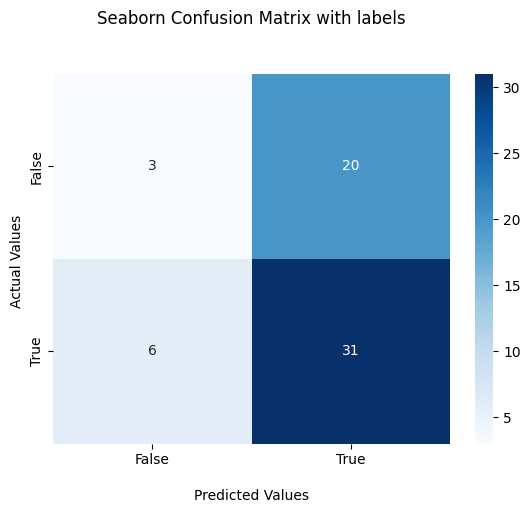

In [29]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

AUC for our classifier is: 0.48413631022326675


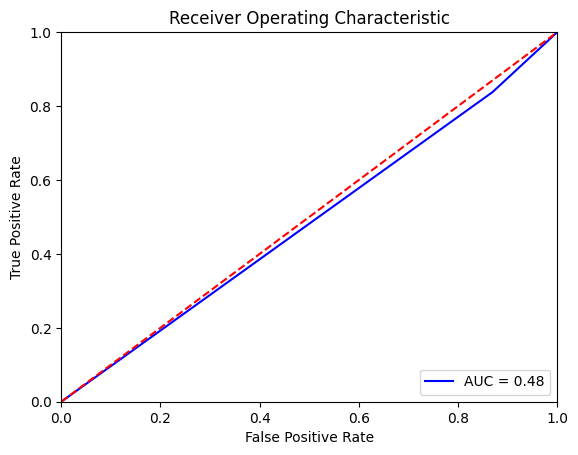

In [30]:
### AUC-ROC Curve

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
## Prediction on test set
class_pred = model.predict(X_test)
class_prob_test = model.predict_proba(X_test)
print(class_prob_test[0])
print(class_pred[0])

[0.49217063 0.50782937]
1


In [32]:
ab = []
for i in class_prob_test[:,0]:
    if i <= 0.5:
        ab.append("Low")
    elif i>0.5 and i<=0.75:
        ab.append("Need Further Evaluation")
    else:
        ab.append("High")   

In [33]:
ab

['Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Need Further Evaluation',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Need Further Evaluation',
 'Low',
 'Low',
 'Low',
 'Low',
 'Need Further Evaluation',
 'Low',
 'Need Further Evaluation',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Need Further Evaluation',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Need Further Evaluation',
 'Need Further Evaluation',
 'Low',
 'Need Further Evaluation',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Need Further Evaluation',
 'Low',
 'Low']

In [34]:
pd.DataFrame(list(zip(class_prob_test[:,0],ab)))

,0,1
0,0.492171,Low
1,0.492171,Low
2,0.492171,Low
3,0.492171,Low
4,0.492171,Low
5,0.492171,Low
6,0.492171,Low
7,0.492171,Low
8,0.492171,Low
9,0.492171,Low


In [35]:
#df[['Feeder_Category', 'target']] feature encoding  before dataset  -> fill miss value 

## start from here

pd.set_option('display.max_columns', None)

df = pd.read_csv("C:/Project/Electricity_project/RawData/GlobalEYUtility_Final_for Demo.csv")
df.head()

,abin,Feeder_Category,BREAKER_MAKE,UpcaseRoadTraffic,Upcase_DepthOfCable,Upcase_SoilCondition,Upcase_LeadExposed,Upcase_ArmourCableCondition,CABLE_SIZE,NO__OF_PARALLEL_RUNNING_CABLES,FaultCurrent_Count,_5Yr_Faults_Count,No_of_Load_transfer_Operations,No_of_Times_Exceeded100_,No_of_times_exceeded_60_,No_of_time_below_60_,No_of_Times_Exceeded90_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,Number_OF_Cables,PILC,XLPE,DATE_ONLY,DAY_OF_WEEK,WEEKEND_Y_N_,Average_Current,MORNING_AVG_CURRENT,AFTERNOON_AVG_CURRENT,EVENING_AVG_CURRENT,Peak_Current,Peak_Slab,Average_voltage,MORNING_AVG_VOLTAGE,AFTERNOON_AVG_VOLTAGE,EVENING_AVG_VOLTAGE,Peak_Voltage,target,Avg_Heat_Index,Morning_AVG_Heat_Index,Afternoon_AVG_Heat_Index,Evening_Avg_Heat_Index,Peak_HI,Avg_humidity,Morning_AVG_humidity,Afternoon_AVG_HUMIDITY,Evening_Avg_HUMIDITY,Max_Humidity,Avg_TEMP,Morning_AVG_TEMP,Afternoon_AVG_TEMP,Evening_Avg_TEMP,Max_TEMP,IR_Value_After_JointingPHASE_TO,MORNING_AVG_CURRENT_N_1,MORNING_AVG_CURRENT_N_2,AFTERNOON_AVG_CURRENT_N_1,AFTERNOON_AVG_CURRENT_N_2,EVENING_AVG_CURRENT_N_1,EVENING_AVG_CURRENT_N_2,MORNING_AVG_VOLTAGE_N_1,MORNING_AVG_VOLTAGE_N_2,AFTERNOON_AVG_VOLTAGE_N_1,AFTERNOON_AVG_VOLTAGE_N_2,EVENING_AVG_VOLTAGE_N_1,EVENING_AVG_VOLTAGE_N_2,TARGET_N_1,TARGET_N_2,AVERAGE_CURRENT_N_1,AVERAGE_CURRENT_N_2,AVERAGE_VOLTAGE_N_1,AVERAGE_VOLTAGE_N_2,AVERAGE_HEAT_INDEX_N_1,AVERAGE_HEAT_INDEX_N_2,AVERAGE_HUMUDITY_N_1,AVERAGE_HUMUDITY_N_2,AVERAGE_TEMP_N_1,AVERAGE_TEMP_N_2,MORNING_AVG_HEAT_INDEX_N_1,MORNING_AVG_HEAT_INDEX_N_2,AFTERNOON_AVG_HEAT_INDEX_N_1,AFTERNOON_AVG_HEAT_INDEX_N_2,EVENING_AVG_HEAT_INDEX_N_1,EVENING_AVG_HEAT_INDEX_N_2,MORNING_AVG_HUMUDITY_N_1,MORNING_AVG_HUMUDITY_N_2,AFTERNOON_AVG_HUMUDITY_N_1,AFTERNOON_AVG_HUMUDITY_N_2,EVENING_AVG_HUMUDITY_N_1,EVENING_AVG_HUMUDITY_N_2,MORNING_AVG_TEMP_N_1,MORNING_AVG_TEMP_N_2,AFTERNOON_AVG_TEMP_N_1,AFTERNOON_AVG_TEMP_N_2,EVENING_AVG_TEMP_N_1,EVENING_AVG_TEMP_N_2,Peak_Current_N_1,Peak_Current_N_2,Peak_Current_Time_N_1,Peak_Current_Time_N_2,Peak_Current_Slab_N_1,Peak_Current_Slab_N_2,New_PublicHoliday,New_Summer,New_Monsoon,New_Winter,_dataobs_,Feeder,Switch,Section Id,Pathid,Path Order,Lat,Long,Customer At Risk,Revenue At Rsik,Assets At Risk,Risk Type,NoFaultsSince2016
0,ED,RES,SIEMENS VCB,MODERATE,NORMAL,DRY,NO,STRONG,120.0,3.0,2.0,5.0,0.0,0.0,0.0,96.0,0.0,586.6,7.0,36.0,2.0,1.0,1.0,08-01-2016,6.0,N,4.352917,9.688485,1.55125,1.565161,43.99,M,11.047187,11.035455,11.026250,11.081290,11.20,1.0,26.667515,23.993545,28.256467,27.873791,31.224829,60.078646,70.946061,48.330312,60.637419,79.34,25.887917,22.996970,27.952188,26.834516,31.11,250.0,68.730303,19.471818,108.005000,20.005000,107.405161,21.148710,11.035455,10.961818,11.026250,11.001875,11.081290,10.954839,0.0,0.0,94.310625,20.191042,11.047187,10.972917,26.667515,26.667515,60.078646,60.078646,25.887917,25.887917,23.993545,23.993545,28.256467,28.256467,27.873791,27.873791,70.946061,70.946061,48.330312,48.330312,60.637419,60.637419,22.996970,22.996970,27.952188,27.952188,26.834516,26.834516,1.5,9.08,0.0,0.0,M,M,N,N,N,Y,379.0,30462.0,10499.0,30462-10499-1,SANTACRUZ RECEIVING STATION-ANAND NAGAR NO.2 S...,2.0,19.080542,72.845893,8000.0,97.0,10.0,Low,0.0
1,ED,RES,ABB SF6,HEAVY,NORMAL,MOIST,NO,STRONG,300.0,1.0,7.0,2.0,0.0,0.0,0.0,96.0,0.0,533.1,5.0,NaN,1.0,0.0,1.0,15-01-2016,6.0,N,4.416875,12.658182,0.10000,0.100000,19.24,M,11.021667,10.977576,11.050000,11.039355,11.27,1.0,24.975674,22.618742,26.488964,25.922561,28.202562,69.590937,74.704545,63.073125,70.875484,76.92,23.927083,21.308182,25.579687,25.009032,27.30,350.0,58.424242,34.783333,79.528125,53.851250,88.881613,52.395484,10.977576,10.977576,11.050000,11.050000,11.039355,11.039355,0.0,0.0,75.294062,46.826563,11.021667,11.021667,24.975674,24.975674,69.590937,69.590937,23.927083,23.927083,22.618742,22.618742,26.488964,26.488964,25.922561,25.922561,74.704545,74.704545,63.073125,63.073125,70.875484,70.875484,21.308182,21.308182,25.579687,25.579687,25.009032,25.009032,0.1,18.46,0.0,0.0,M,M,N,N,N,Y,705.0,30462.0,10499.0

In [36]:
df = df[:300]
df.shape

(300, 119)

In [37]:
df

,abin,Feeder_Category,BREAKER_MAKE,UpcaseRoadTraffic,Upcase_DepthOfCable,Upcase_SoilCondition,Upcase_LeadExposed,Upcase_ArmourCableCondition,CABLE_SIZE,NO__OF_PARALLEL_RUNNING_CABLES,FaultCurrent_Count,_5Yr_Faults_Count,No_of_Load_transfer_Operations,No_of_Times_Exceeded100_,No_of_times_exceeded_60_,No_of_time_below_60_,No_of_Times_Exceeded90_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,Number_OF_Cables,PILC,XLPE,DATE_ONLY,DAY_OF_WEEK,WEEKEND_Y_N_,Average_Current,MORNING_AVG_CURRENT,AFTERNOON_AVG_CURRENT,EVENING_AVG_CURRENT,Peak_Current,Peak_Slab,Average_voltage,MORNING_AVG_VOLTAGE,AFTERNOON_AVG_VOLTAGE,EVENING_AVG_VOLTAGE,Peak_Voltage,target,Avg_Heat_Index,Morning_AVG_Heat_Index,Afternoon_AVG_Heat_Index,Evening_Avg_Heat_Index,Peak_HI,Avg_humidity,Morning_AVG_humidity,Afternoon_AVG_HUMIDITY,Evening_Avg_HUMIDITY,Max_Humidity,Avg_TEMP,Morning_AVG_TEMP,Afternoon_AVG_TEMP,Evening_Avg_TEMP,Max_TEMP,IR_Value_After_JointingPHASE_TO,MORNING_AVG_CURRENT_N_1,MORNING_AVG_CURRENT_N_2,AFTERNOON_AVG_CURRENT_N_1,AFTERNOON_AVG_CURRENT_N_2,EVENING_AVG_CURRENT_N_1,EVENING_AVG_CURRENT_N_2,MORNING_AVG_VOLTAGE_N_1,MORNING_AVG_VOLTAGE_N_2,AFTERNOON_AVG_VOLTAGE_N_1,AFTERNOON_AVG_VOLTAGE_N_2,EVENING_AVG_VOLTAGE_N_1,EVENING_AVG_VOLTAGE_N_2,TARGET_N_1,TARGET_N_2,AVERAGE_CURRENT_N_1,AVERAGE_CURRENT_N_2,AVERAGE_VOLTAGE_N_1,AVERAGE_VOLTAGE_N_2,AVERAGE_HEAT_INDEX_N_1,AVERAGE_HEAT_INDEX_N_2,AVERAGE_HUMUDITY_N_1,AVERAGE_HUMUDITY_N_2,AVERAGE_TEMP_N_1,AVERAGE_TEMP_N_2,MORNING_AVG_HEAT_INDEX_N_1,MORNING_AVG_HEAT_INDEX_N_2,AFTERNOON_AVG_HEAT_INDEX_N_1,AFTERNOON_AVG_HEAT_INDEX_N_2,EVENING_AVG_HEAT_INDEX_N_1,EVENING_AVG_HEAT_INDEX_N_2,MORNING_AVG_HUMUDITY_N_1,MORNING_AVG_HUMUDITY_N_2,AFTERNOON_AVG_HUMUDITY_N_1,AFTERNOON_AVG_HUMUDITY_N_2,EVENING_AVG_HUMUDITY_N_1,EVENING_AVG_HUMUDITY_N_2,MORNING_AVG_TEMP_N_1,MORNING_AVG_TEMP_N_2,AFTERNOON_AVG_TEMP_N_1,AFTERNOON_AVG_TEMP_N_2,EVENING_AVG_TEMP_N_1,EVENING_AVG_TEMP_N_2,Peak_Current_N_1,Peak_Current_N_2,Peak_Current_Time_N_1,Peak_Current_Time_N_2,Peak_Current_Slab_N_1,Peak_Current_Slab_N_2,New_PublicHoliday,New_Summer,New_Monsoon,New_Winter,_dataobs_,Feeder,Switch,Section Id,Pathid,Path Order,Lat,Long,Customer At Risk,Revenue At Rsik,Assets At Risk,Risk Type,NoFaultsSince2016
0,ED,RES,SIEMENS VCB,MODERATE,NORMAL,DRY,NO,STRONG,120.0,3.0,2.0,5.0,0.0,0.0,0.0,96.0,0.0,586.6,7.0,36.0,2.0,1.0,1.0,08-01-2016,6.0,N,4.352917,9.688485,1.551250,1.565161,43.99,M,11.047187,11.035455,11.026250,11.081290,11.20,1.0,26.667515,23.993545,28.256467,27.873791,31.224829,60.078646,70.946061,48.330312,60.637419,79.34,25.887917,22.996970,27.952188,26.834516,31.11,250.0,68.730303,19.471818,108.005000,20.005000,107.405161,21.148710,11.035455,10.961818,11.026250,11.001875,11.081290,10.954839,0.0,0.0,94.310625,20.191042,11.047187,10.972917,26.667515,26.667515,60.078646,60.078646,25.887917,25.887917,23.993545,23.993545,28.256467,28.256467,27.873791,27.873791,70.946061,70.946061,48.330312,48.330312,60.637419,60.637419,22.996970,22.996970,27.952188,27.952188,26.834516,26.834516,1.50,9.08,0.0,0.0,M,M,N,N,N,Y,379.0,30462.0,10499.0,30462-10499-1,SANTACRUZ RECEIVING STATION-ANAND NAGAR NO.2 S...,2.0,19.080542,72.845893,8000.0,97.0,10.0,Low,0.0
1,ED,RES,ABB SF6,HEAVY,NORMAL,MOIST,NO,STRONG,300.0,1.0,7.0,2.0,0.0,0.0,0.0,96.0,0.0,533.1,5.0,NaN,1.0,0.0,1.0,15-01-2016,6.0,N,4.416875,12.658182,0.100000,0.100000,19.24,M,11.021667,10.977576,11.050000,11.039355,11.27,1.0,24.975674,22.618742,26.488964,25.922561,28.202562,69.590937,74.704545,63.073125,70.875484,76.92,23.927083,21.308182,25.579687,25.009032,27.30,350.0,58.424242,34.783333,79.528125,53.851250,88.881613,52.395484,10.977576,10.977576,11.050000,11.050000,11.039355,11.039355,0.0,0.0,75.294062,46.826563,11.021667,11.021667,24.975674,24.975674,69.590937,69.590937,23.927083,23.927083,22.618742,22.618742,26.488964,26.488964,25.922561,25.922561,74.704545,74.704545,63.073125,63.073125,70.875484,70.875484,21.308182,21.308182,25.579687,25.579687,25.009032,25.009032,0.10,18.46,0.0,0.0,M,M,N,N,N,Y,705.0,30462.0,104

In [38]:
def dataset_divide(df):
    X_p = df.drop(columns=['target'])
    y_p = df['target']
    ## splitting in train test val set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.2, random_state=1)
    print(f"X_train : {X_train.shape}")
    print(f"X_test : {X_test.shape}")
    print(f"y_train : {y_train.shape}")
    print(f"y_test : {y_test.shape}")
    return X_train, X_test, y_train, y_test

def get_training(X_train, X_test, y_train, y_test):
    algos = [LogisticRegression(),
             DecisionTreeClassifier(), 
             RandomForestClassifier(),
             XGBClassifier(),
             GradientBoostingClassifier()]

    names = ["Logistic Regression",
             "DecisionTree Classifier",
             "RandomForest Classifier",
             "XGBClassifier",
             "GradientBoostingClassifier"]

    acc = []
    pre = []
    rec = []
    f1 = []
    r_a = []
    
    for name in algos:
        model = name
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accu = accuracy_score(y_test,y_pred)
        prec = precision_score(y_test,y_pred)
        reca = recall_score(y_test,y_pred)
        f1_sc = f1_score(y_test,y_pred)
        roc_auc = roc_auc_score(y_test,y_pred)
        
        acc.append(accu) 
        pre.append(prec)
        rec.append(rec)
        f1.append(f1_score)
        r_a.append(roc_auc)
    
    a={'Name':names,
       'Accuracy_Score':acc, 
       'Precision' : pre,
       'Recall' : reca,
       'F_1 Score ': f1_sc,
       'ROC_AUC' : r_a}
    evaluation = pd.DataFrame(a)
    print(evaluation)
    

def get_prediction(X_train, X_test, y_train, y_test):
    ## Prediction on test set
    model = XGBClassifier(n_estimators=100, max_depth=2 ,eta=0.1)
    model.fit(X_train,y_train)
    print(f"Score on training {model.score(X_train,y_train)}")
    class_pred = model.predict(X_test)
    class_prob_test = model.predict_proba(X_test)
    print(class_prob_test[0])
    print(class_pred[0])

    ab = []
    for i in class_prob_test[:,0]:
        if i <= 0.5:
            ab.append("Low")
        elif i>0.5 and i<=0.75:
            ab.append("Need Further Evaluation")
        else:
            ab.append("High")   


    print(pd.DataFrame(list(zip(class_prob_test[:,0],ab)),columns =['Prob', 'class']))

In [39]:
df['Feeder_Category'] = df['Feeder_Category'].map({
                                                    'RES':0,
                                                    'COM':1,
                                                    'MIX':2
                                                })

df['Feeder_Category'].fillna(0,inplace=True)

In [40]:
df2 = df[['Feeder_Category','target']]

X_train, X_test, y_train, y_test = dataset_divide(df2)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

#category , age, sizw length 

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.566667   0.607843  0.837838  \
1     DecisionTree Classifier        0.566667   0.607843  0.837838   
2     RandomForest Classifier        0.566667   0.607843  0.837838   
3               XGBClassifier        0.566667   0.607843  0.837838   
4  GradientBoostingClassifier        0.566667   0.607843  0.837838   

   F_1 Score    ROC_AUC  
0    0.704545  0.484136  
1    0.704545  0.484136  
2    0.704545  0.484136  
3    0.704545  0.484136  
4    0.704545  0.484136  
None
Score on training 0.575
[0.4054318 0.5945682]
1
        Prob                    class
0   0.405432                      Low
1   0.405432                      Low
2   0.405432                      Low
3   0.405432                      Low
4   0.405432                      Low
5   0.405432                      Low
6   0.405432                      Lo

In [41]:
## Feeder_Category, age vs target
df['BREAKER_MAKE'] = df['BREAKER_MAKE'].map({
                                'SIEMENS VCB':0,
                                'ABB SF6':1,
                                'CR VCB':2,
                                'SCHNIDER VCB':3,
                                'VOLTAS SF6':4,
                                'CG VCB':5,
                                'ABB VCB':6,
                                'JYOTI VCB':7,
                                'AREVA VCB':8
                            })
df['BREAKER_MAKE'].fillna(0,inplace=True)

In [42]:
df2 = df[['Feeder_Category','BREAKER_MAKE','target']]

X_train, X_test, y_train, y_test = dataset_divide(df2)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 2)
X_test : (60, 2)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.583333   0.611111  0.648649  \
1     DecisionTree Classifier        0.550000   0.631579  0.648649   
2     RandomForest Classifier        0.566667   0.634146  0.648649   
3               XGBClassifier        0.550000   0.631579  0.648649   
4  GradientBoostingClassifier        0.550000   0.631579  0.648649   

   F_1 Score    ROC_AUC  
0        0.64  0.489424  
1        0.64  0.519976  
2        0.64  0.525264  
3        0.64  0.519976  
4        0.64  0.519976  
None
Score on training 0.6291666666666667
[0.460088 0.539912]
1
        Prob                    class
0   0.460088                      Low
1   0.424629                      Low
2   0.512578  Need Further Evaluation
3   0.460088                      Low
4   0.460088                      Low
5   0.224299                      Low
6   0.340367             

<Axes: ylabel='Frequency'>

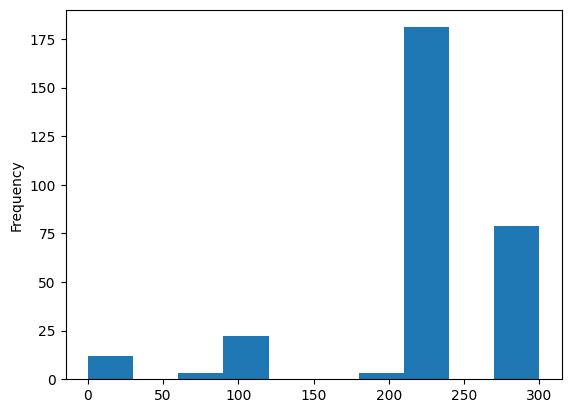

In [43]:
## Feeder_Category, age , size, length vs target

df['CABLE_SIZE'].plot(kind='hist')

In [44]:
#df['CABLE_SIZE'].isna().sum()
#df['AGE_YRS_'].isna().sum()
df['AGE_YRS_'].fillna(df['AGE_YRS_'].mean(),inplace=True)

In [45]:
import scipy.stats as stat
import pylab 

#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [46]:
df3 = df[['Feeder_Category','AGE_YRS_','target']]

X_train, X_test, y_train, y_test = dataset_divide(df3)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 2)
X_test : (60, 2)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.633333   0.653061  0.810811  \
1     DecisionTree Classifier        0.650000   0.735294  0.810811   
2     RandomForest Classifier        0.666667   0.707317  0.810811   
3               XGBClassifier        0.666667   0.729730  0.810811   
4  GradientBoostingClassifier        0.700000   0.731707  0.810811   

   F_1 Score    ROC_AUC  
0    0.769231  0.562867  
1    0.769231  0.642186  
2    0.769231  0.631022  
3    0.769231  0.647474  
4    0.769231  0.666275  
None
Score on training 0.6625
[0.31139356 0.68860644]
1
        Prob                    class
0   0.311394                      Low
1   0.311394                      Low
2   0.311394                      Low
3   0.311394                      Low
4   0.458958                      Low
5   0.444194                      Low
6   0.344986                     

In [47]:
#df['LENGTH_OF_CABLE_MTRS_'].isna().sum()

In [48]:
df4 = df[['Feeder_Category','AGE_YRS_','LENGTH_OF_CABLE_MTRS_','target']]

X_train, X_test, y_train, y_test = dataset_divide(df2)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 2)
X_test : (60, 2)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.583333   0.611111  0.648649  \
1     DecisionTree Classifier        0.550000   0.631579  0.648649   
2     RandomForest Classifier        0.566667   0.634146  0.648649   
3               XGBClassifier        0.550000   0.631579  0.648649   
4  GradientBoostingClassifier        0.550000   0.631579  0.648649   

   F_1 Score    ROC_AUC  
0        0.64  0.489424  
1        0.64  0.519976  
2        0.64  0.525264  
3        0.64  0.519976  
4        0.64  0.519976  
None
Score on training 0.6291666666666667
[0.460088 0.539912]
1
        Prob                    class
0   0.460088                      Low
1   0.424629                      Low
2   0.512578  Need Further Evaluation
3   0.460088                      Low
4   0.460088                      Low
5   0.224299                      Low
6   0.340367             

In [49]:
df4

,Feeder_Category,AGE_YRS_,LENGTH_OF_CABLE_MTRS_,target
0,0.0,36.000000,586.6,1.0
1,0.0,22.750988,533.1,1.0
2,0.0,22.750988,600.0,1.0
3,0.0,23.000000,682.5,1.0
4,0.0,20.000000,381.0,1.0
...,...,...,...,...
295,1.0,22.000000,1276.3,1.0
296,1.0,22.000000,1276.3,1.0
297,0.0,18.000000,387.1,0.0
298,0.0,24.000000,1078.1,1.0


In [50]:
from sklearn.preprocessing import StandardScaler
"""df4[['AGE_YRS_','LENGTH_OF_CABLE_MTRS_']] = df4[['AGE_YRS_','LENGTH_OF_CABLE_MTRS_']].apply(lambda x: StandardScaler().fit_transform(x))
df4 """

#list for cols to scale
cols_to_scale = ['AGE_YRS_','LENGTH_OF_CABLE_MTRS_']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(df4[cols_to_scale])

#scale selected data
df4[cols_to_scale] = scaler.transform(df4[cols_to_scale])

C:\Users\YR272YB\AppData\Local\Temp\ipykernel_22472\3275104526.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[cols_to_scale] = scaler.transform(df4[cols_to_scale])


In [51]:
print(df4)

X_train, X_test, y_train, y_test = dataset_divide(df4)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

     Feeder_Category      AGE_YRS_  LENGTH_OF_CABLE_MTRS_  target
0                0.0  1.156581e+00              -0.768589     1.0
1                0.0 -3.101366e-16              -0.860287     1.0
2                0.0 -3.101366e-16              -0.745621     1.0
3                0.0  2.173766e-02              -0.604218     1.0
4                0.0 -2.401494e-01              -1.120983     1.0
..               ...           ...                    ...     ...
295              1.0 -6.555802e-02               0.413545     1.0
296              1.0 -6.555802e-02               0.413545     1.0
297              0.0 -4.147407e-01              -1.110528     0.0
298              0.0  1.090333e-01               0.073834     1.0
299              0.0  1.854947e+00              -0.488524     1.0

[300 rows x 4 columns]
X_train : (240, 3)
X_test : (60, 3)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.583333 

In [52]:
df['CABLE_SIZE'].isna().sum()

0

In [53]:
df5 = df[['Feeder_Category','AGE_YRS_','LENGTH_OF_CABLE_MTRS_','CABLE_SIZE','target']]

X_train, X_test, y_train, y_test = dataset_divide(df5)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 4)
X_test : (60, 4)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.600000   0.651163  0.540541  \
1     DecisionTree Classifier        0.466667   0.600000  0.540541   
2     RandomForest Classifier        0.550000   0.666667  0.540541   
3               XGBClassifier        0.566667   0.677419  0.540541   
4  GradientBoostingClassifier        0.516667   0.625000  0.540541   

   F_1 Score    ROC_AUC  
0     0.57971  0.552291  
1     0.57971  0.485311  
2     0.57971  0.552879  
3     0.57971  0.566392  
4     0.57971  0.509401  
None
Score on training 0.7291666666666666
[0.685593   0.31440702]
0
        Prob                    class
0   0.685593  Need Further Evaluation
1   0.505266  Need Further Evaluation
2   0.466246                      Low
3   0.685593  Need Further Evaluation
4   0.168000                      Low
5   0.833186                     High
6   0.141588         

In [54]:
## with respect to current

#Average_Current	MORNING_AVG_CURRENT	AFTERNOON_AVG_CURRENT	EVENING_AVG_CURRENT	Peak_Current


In [55]:
## Average_Current , Peak_Current  
df6 = df[['Average_Current','Peak_Current','target']]
print(df6.head())

X_train, X_test, y_train, y_test = dataset_divide(df6)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

   Average_Current  Peak_Current  target
0         4.352917         43.99     1.0
1         4.416875         19.24     1.0
2        14.331250         20.80     1.0
3        27.535312        109.47     1.0
4         0.845625         80.23     1.0
X_train : (240, 2)
X_test : (60, 2)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.816667   0.933333  0.810811  \
1     DecisionTree Classifier        0.866667   0.939394  0.810811   
2     RandomForest Classifier        0.850000   0.937500  0.810811   
3               XGBClassifier        0.800000   0.857143  0.810811   
4  GradientBoostingClassifier        0.850000   0.937500  0.810811   

   F_1 Score    ROC_AUC  
0    0.869565  0.834900  
1    0.869565  0.875441  
2    0.869565  0.861927  
3    0.869565  0.796710  
4    0.869565  0.861927  
None
Score on training 0.9375
[0.68167865 0.31832135]
0
        Prob                    class
0   0.681679  N

In [56]:
## Average_Current , Peak_Current

df7 = df[['Average_Current','MORNING_AVG_CURRENT','Peak_Current','target']]
print(df7.head())

X_train, X_test, y_train, y_test = dataset_divide(df7)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

   Average_Current  MORNING_AVG_CURRENT  Peak_Current  target
0         4.352917             9.688485         43.99     1.0
1         4.416875            12.658182         19.24     1.0
2        14.331250            20.800000         20.80     1.0
3        27.535312            75.023333        109.47     1.0
4         0.845625             2.440909         80.23     1.0
X_train : (240, 3)
X_test : (60, 3)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.866667   0.967742  0.810811  \
1     DecisionTree Classifier        0.833333   0.909091  0.810811   
2     RandomForest Classifier        0.866667   0.967742  0.810811   
3               XGBClassifier        0.916667   0.970588  0.810811   
4  GradientBoostingClassifier        0.850000   0.937500  0.810811   

   F_1 Score    ROC_AUC  
0    0.869565  0.883666  
1    0.869565  0.840188  
2    0.869565  0.883666  
3    0.869565  0.924207  
4    0.86

In [57]:
## Average_Current , Peak_Current

df7 = df[['Average_Current','EVENING_AVG_CURRENT','Peak_Current','target']]
print(df7.head())

X_train, X_test, y_train, y_test = dataset_divide(df7)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

   Average_Current  EVENING_AVG_CURRENT  Peak_Current  target
0         4.352917             1.565161         43.99     1.0
1         4.416875             0.100000         19.24     1.0
2        14.331250             0.767742         20.80     1.0
3        27.535312             0.100000        109.47     1.0
4         0.845625             0.010000         80.23     1.0
X_train : (240, 3)
X_test : (60, 3)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.866667    1.00000  0.891892  \
1     DecisionTree Classifier        0.883333    0.96875  0.891892   
2     RandomForest Classifier        0.916667    1.00000  0.891892   
3               XGBClassifier        0.933333    1.00000  0.891892   
4  GradientBoostingClassifier        0.933333    1.00000  0.891892   

   F_1 Score    ROC_AUC  
0    0.942857  0.891892  
1    0.942857  0.897180  
2    0.942857  0.932432  
3    0.942857  0.945946  
4    0.94

In [58]:
df7 = df[['Average_Current','AFTERNOON_AVG_CURRENT','Peak_Current','target']]
print(df7.head())

X_train, X_test, y_train, y_test = dataset_divide(df7)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

   Average_Current  AFTERNOON_AVG_CURRENT  Peak_Current  target
0         4.352917                1.55125         43.99     1.0
1         4.416875                0.10000         19.24     1.0
2        14.331250               20.80000         20.80     1.0
3        27.535312                5.14125        109.47     1.0
4         0.845625                0.01000         80.23     1.0
X_train : (240, 3)
X_test : (60, 3)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.816667   0.933333  0.783784  \
1     DecisionTree Classifier        0.800000   0.857143  0.783784   
2     RandomForest Classifier        0.850000   0.911765  0.783784   
3               XGBClassifier        0.866667   0.939394  0.783784   
4  GradientBoostingClassifier        0.833333   0.935484  0.783784   

   F_1 Score    ROC_AUC  
0    0.852941  0.834900  
1    0.852941  0.796710  
2    0.852941  0.853702  
3    0.852941  0.875441

In [59]:
df8 = df[['Average_Current','MORNING_AVG_CURRENT','AFTERNOON_AVG_CURRENT','EVENING_AVG_CURRENT','Peak_Current','target']]
print(df8.head())

X_train, X_test, y_train, y_test = dataset_divide(df8)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

   Average_Current  MORNING_AVG_CURRENT  AFTERNOON_AVG_CURRENT   
0         4.352917             9.688485                1.55125  \
1         4.416875            12.658182                0.10000   
2        14.331250            20.800000               20.80000   
3        27.535312            75.023333                5.14125   
4         0.845625             2.440909                0.01000   

   EVENING_AVG_CURRENT  Peak_Current  target  
0             1.565161         43.99     1.0  
1             0.100000         19.24     1.0  
2             0.767742         20.80     1.0  
3             0.100000        109.47     1.0  
4             0.010000         80.23     1.0  
X_train : (240, 5)
X_test : (60, 5)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.900000    1.00000  0.864865  \
1     DecisionTree Classifier        0.883333    0.96875  0.864865   
2     RandomForest Classifier        0.9166

In [60]:
## Average_voltage	MORNING_AVG_VOLTAGE	AFTERNOON_AVG_VOLTAGE	EVENING_AVG_VOLTAGE	Peak_Voltage


df9 = df[['Average_voltage','MORNING_AVG_VOLTAGE','AFTERNOON_AVG_VOLTAGE','EVENING_AVG_VOLTAGE','Peak_Voltage','target']]
print(df9.head())

X_train, X_test, y_train, y_test = dataset_divide(df9)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

   Average_voltage  MORNING_AVG_VOLTAGE  AFTERNOON_AVG_VOLTAGE   
0        11.047187            11.035455              11.026250  \
1        11.021667            10.977576              11.050000   
2        11.066146            11.131818              11.065312   
3        11.221042            11.276970              11.167813   
4        11.077917            11.085455              11.102813   

   EVENING_AVG_VOLTAGE  Peak_Voltage  target  
0            11.081290         11.20     1.0  
1            11.039355         11.27     1.0  
2            10.997097         11.49     1.0  
3            11.216452         11.41     1.0  
4            11.044194         11.39     1.0  
X_train : (240, 5)
X_test : (60, 5)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.616667   0.616667  0.540541  \
1     DecisionTree Classifier        0.650000   0.766667  0.540541   
2     RandomForest Classifier        0.5666

In [61]:
## Avg_Heat_Index	Morning_AVG_Heat_Index	Afternoon_AVG_Heat_Index	Evening_Avg_Heat_Index	Peak_HI


df10 = df[['Avg_Heat_Index','Morning_AVG_Heat_Index','Afternoon_AVG_Heat_Index','Evening_Avg_Heat_Index','Peak_HI','target']]
print(df10.head())

X_train, X_test, y_train, y_test = dataset_divide(df10)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

   Avg_Heat_Index  Morning_AVG_Heat_Index  Afternoon_AVG_Heat_Index   
0       26.667515               23.993545                 28.256467  \
1       24.975674               22.618742                 26.488964   
2       25.394108               23.238414                 26.747914   
3       25.914466               24.431373                 27.060845   
4       26.553766               23.406862                 29.567852   

   Evening_Avg_Heat_Index    Peak_HI  target  
0               27.873791  31.224829     1.0  
1               25.922561  28.202562     1.0  
2               26.291401  29.479176     1.0  
3               26.309882  28.942341     1.0  
4               26.792381  32.863735     1.0  
X_train : (240, 5)
X_test : (60, 5)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.550000   0.625000  0.594595  \
1     DecisionTree Classifier        0.566667   0.666667  0.594595   
2     RandomF

In [62]:
## Avg_humidity	Morning_AVG_humidity	Afternoon_AVG_HUMIDITY	Evening_Avg_HUMIDITY	Max_Humidity

df11 = df[['Avg_humidity','Morning_AVG_humidity','Afternoon_AVG_HUMIDITY','Evening_Avg_HUMIDITY','Max_Humidity','target']]
print(df11.head())

X_train, X_test, y_train, y_test = dataset_divide(df11)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

   Avg_humidity  Morning_AVG_humidity  Afternoon_AVG_HUMIDITY   
0     60.078646             70.946061               48.330312  \
1     69.590937             74.704545               63.073125   
2     62.813750             69.955758               56.565312   
3     50.201458             60.537879               39.792812   
4     64.328646             72.218485               55.434375   

   Evening_Avg_HUMIDITY  Max_Humidity  target  
0             60.637419         79.34     1.0  
1             70.875484         76.92     1.0  
2             61.660968         73.11     1.0  
3             49.942581         64.66     1.0  
4             65.110968         74.42     1.0  
X_train : (240, 5)
X_test : (60, 5)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.600000   0.614035  0.702703  \
1     DecisionTree Classifier        0.616667   0.705882  0.702703   
2     RandomForest Classifier        0.6500

In [63]:
## Avg_TEMP	Morning_AVG_TEMP	Afternoon_AVG_TEMP	Evening_Avg_TEMP	Max_TEMP

df12 = df[['Avg_TEMP','Morning_AVG_TEMP','Afternoon_AVG_TEMP','Evening_Avg_TEMP','Max_TEMP','target']]
print(df12.head())

X_train, X_test, y_train, y_test = dataset_divide(df12)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

    Avg_TEMP  Morning_AVG_TEMP  Afternoon_AVG_TEMP  Evening_Avg_TEMP   
0  25.887917         22.996970           27.952188         26.834516  \
1  23.927083         21.308182           25.579687         25.009032   
2  23.755521         20.099697           25.985937         25.344839   
3  24.734896         21.665455           27.047500         25.615161   
4  25.372917         22.035152           28.292813         25.911935   

   Max_TEMP  target  
0     31.11     1.0  
1     27.30     1.0  
2     29.36     1.0  
3     30.33     1.0  
4     31.12     1.0  
X_train : (240, 5)
X_test : (60, 5)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.566667   0.627907  0.648649  \
1     DecisionTree Classifier        0.566667   0.657143  0.648649   
2     RandomForest Classifier        0.666667   0.717949  0.648649   
3               XGBClassifier        0.666667   0.707317  0.648649   
4  GradientBoosti

In [64]:
#UpcaseRoadTraffic	Upcase_DepthOfCable	Upcase_SoilCondition	Upcase_LeadExposed	Upcase_ArmourCableCondition

df['UpcaseRoadTraffic'] = df['UpcaseRoadTraffic'].map({
    'HEAVY':0,
    'MODERATE':1,
    'LOW':2
})

df['Upcase_DepthOfCable'] = df['Upcase_DepthOfCable'].map({
    'NORMAL':0,
    'SHALLOW':1,
    'DEEP':2
})

df['Upcase_SoilCondition'] = df['Upcase_SoilCondition'].map({
    'DRY':0,
    'MOIST':1,
    'WET':2,
    'ROCKY':3
})

df['Upcase_LeadExposed'] = df['Upcase_LeadExposed'].map({
    'NO':0,
    'YES':1
})

df['Upcase_ArmourCableCondition'] = df['Upcase_ArmourCableCondition'].map({
    'STRONG':0,
    'CORRODED':1,
    'EXPOSED':2
})


In [65]:
#UpcaseRoadTraffic	Upcase_DepthOfCable	Upcase_SoilCondition	Upcase_LeadExposed	Upcase_ArmourCableCondition

df13 = df[['Feeder_Category','UpcaseRoadTraffic','Upcase_DepthOfCable','Upcase_SoilCondition','Upcase_LeadExposed','Upcase_ArmourCableCondition','target']]
print(df13.head())

X_train, X_test, y_train, y_test = dataset_divide(df13)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

   Feeder_Category  UpcaseRoadTraffic  Upcase_DepthOfCable   
0              0.0                  1                    0  \
1              0.0                  0                    0   
2              0.0                  1                    0   
3              0.0                  2                    0   
4              0.0                  1                    0   

   Upcase_SoilCondition  Upcase_LeadExposed  Upcase_ArmourCableCondition   
0                     0                   0                            0  \
1                     1                   0                            0   
2                     0                   0                            0   
3                     2                   0                            1   
4                     0                   0                            0   

   target  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  
X_train : (240, 6)
X_test : (60, 6)
y_train : (240,)
y_test : (60,)
                         Name 

In [66]:
### considering all features :
# 'Feeder_Category','UpcaseRoadTraffic','Upcase_DepthOfCable','Upcase_SoilCondition','Upcase_LeadExposed','Upcase_ArmourCableCondition'
# CABLE_SIZE, LENGTH_OF_CABLE_MTRS_, AGE_YRS_, Average_Current, Average_voltage, Avg_Heat_Index, Avg_humidity, Avg_TEMP



df14 = df[['Feeder_Category','UpcaseRoadTraffic','Upcase_DepthOfCable','Upcase_SoilCondition','Upcase_LeadExposed','Upcase_ArmourCableCondition',
           'CABLE_SIZE','LENGTH_OF_CABLE_MTRS_','AGE_YRS_','Average_Current','Average_voltage','Avg_Heat_Index','Avg_humidity','Avg_TEMP',
           'target']]
print(df14.head())

X_train, X_test, y_train, y_test = dataset_divide(df14)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

   Feeder_Category  UpcaseRoadTraffic  Upcase_DepthOfCable   
0              0.0                  1                    0  \
1              0.0                  0                    0   
2              0.0                  1                    0   
3              0.0                  2                    0   
4              0.0                  1                    0   

   Upcase_SoilCondition  Upcase_LeadExposed  Upcase_ArmourCableCondition   
0                     0                   0                            0  \
1                     1                   0                            0   
2                     0                   0                            0   
3                     2                   0                            1   
4                     0                   0                            0   

   CABLE_SIZE  LENGTH_OF_CABLE_MTRS_   AGE_YRS_  Average_Current   
0       120.0                  586.6  36.000000         4.352917  \
1       300.0                  533

C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.683333   0.750000  0.648649  \
1     DecisionTree Classifier        0.566667   0.677419  0.648649   
2     RandomForest Classifier        0.750000   0.823529  0.648649   
3               XGBClassifier        0.733333   0.818182  0.648649   
4  GradientBoostingClassifier        0.600000   0.685714  0.648649   

   F_1 Score    ROC_AUC  
0    0.666667  0.669213  
1    0.666667  0.566392  
2    0.666667  0.747944  
3    0.666667  0.734430  
4    0.666667  0.585194  
None
Score on training 0.9083333333333333
[0.64512694 0.3548731 ]
0
        Prob                    class
0   0.645127  Need Further Evaluation
1   0.682778  Need Further Evaluation
2   0.311255                      Low
3   0.683952  Need Further Evaluation
4   0.081834                      Low
5   0.948417                     High
6   0.130344                      Low
7   0.467700                      Low
8   0.616022 

In [67]:
df15 = df14.copy()
df15

,Feeder_Category,UpcaseRoadTraffic,Upcase_DepthOfCable,Upcase_SoilCondition,Upcase_LeadExposed,Upcase_ArmourCableCondition,CABLE_SIZE,LENGTH_OF_CABLE_MTRS_,AGE_YRS_,Average_Current,Average_voltage,Avg_Heat_Index,Avg_humidity,Avg_TEMP,target
0,0.0,1,0,0,0,0,120.0,586.6,36.000000,4.352917,11.047187,26.667515,60.078646,25.887917,1.0
1,0.0,0,0,1,0,0,300.0,533.1,22.750988,4.416875,11.021667,24.975674,69.590937,23.927083,1.0
2,0.0,1,0,0,0,0,300.0,600.0,22.750988,14.331250,11.066146,25.394108,62.813750,23.755521,1.0
3,0.0,2,0,2,0,1,240.0,682.5,23.000000,27.535312,11.221042,25.914466,50.201458,24.734896,1.0
4,0.0,1,0,0,0,0,240.0,381.0,20.000000,0.845625,11.077917,26.553766,64.328646,25.372917,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0,2,1,1,1,240.0,1276.3,22.000000,63.178125,11.044375,34.500309,74.840833,29.382917,1.0
296,1.0,0,2,1,1,1,240.0,1276.3,22.000000,60.295521,11.067500,34.330905,62.240208,30.371562,1.0
297,0.0,1,0,0,0,0,240.0,387.1,18.000000,94.052188,11.092187,26.413268,62.986250,25.350833,0.0
298,0.0,1,0,0,0,1,240.0,1078.1,24.000000,71.319583,11.070833,36.264426,81.260104,29.496875,1.0


In [68]:
#list for cols to scale
cols_to_scale = ['CABLE_SIZE','LENGTH_OF_CABLE_MTRS_','AGE_YRS_','Average_Current','Average_voltage','Avg_Heat_Index','Avg_humidity','Avg_TEMP']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(df15[cols_to_scale])

#scale selected data
df15[cols_to_scale] = scaler.transform(df15[cols_to_scale])

In [69]:
df15

,Feeder_Category,UpcaseRoadTraffic,Upcase_DepthOfCable,Upcase_SoilCondition,Upcase_LeadExposed,Upcase_ArmourCableCondition,CABLE_SIZE,LENGTH_OF_CABLE_MTRS_,AGE_YRS_,Average_Current,Average_voltage,Avg_Heat_Index,Avg_humidity,Avg_TEMP,target
0,0.0,1,0,0,0,0,-1.679207,-0.768589,1.156581e+00,-1.021913,0.197112,-1.225980,-1.163945,-1.173290,1.0
1,0.0,0,0,1,0,0,0.973177,-0.860287,-3.101366e-16,-1.020382,0.181703,-1.559378,-0.481656,-2.140114,1.0
2,0.0,1,0,0,0,0,0.973177,-0.745621,-3.101366e-16,-0.782966,0.208559,-1.476921,-0.967764,-2.224706,1.0
3,0.0,2,0,2,0,1,0.089049,-0.604218,2.173766e-02,-0.466774,0.302082,-1.374378,-1.872408,-1.741808,1.0
4,0.0,1,0,0,0,0,0.089049,-1.120983,-2.401494e-01,-1.105901,0.215666,-1.248396,-0.859105,-1.427220,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0,2,1,1,1,0.089049,0.413545,-6.555802e-02,0.386750,0.195414,0.317569,-0.105096,0.549982,1.0
296,1.0,0,2,1,1,1,0.089049,0.413545,-6.555802e-02,0.317722,0.209376,0.284186,-1.008903,1.037452,1.0
297,0.0,1,0,0,0,0,0.089049,-1.110528,-4.147407e-01,1.126079,0.224282,-1.276083,-0.955391,-1.438109,0.0
298,0.0,1,0,0,0,1,0.089049,0.073834,1.090333e-01,0.581710,0.211389,0.665210,0.355340,0.606171,1.0


In [70]:
X_train, X_test, y_train, y_test = dataset_divide(df15)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 14)
X_test : (60, 14)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.716667   0.763158  0.648649  \
1     DecisionTree Classifier        0.533333   0.645161  0.648649   
2     RandomForest Classifier        0.716667   0.777778  0.648649   
3               XGBClassifier        0.733333   0.818182  0.648649   
4  GradientBoostingClassifier        0.600000   0.685714  0.648649   

   F_1 Score    ROC_AUC  
0    0.666667  0.696240  
1    0.666667  0.531140  
2    0.666667  0.704465  
3    0.666667  0.734430  
4    0.666667  0.585194  
None
Score on training 0.9083333333333333
[0.64512694 0.3548731 ]
0
        Prob                    class
0   0.645127  Need Further Evaluation
1   0.682778  Need Further Evaluation
2   0.311255                      Low
3   0.683952  Need Further Evaluation
4   0.081834                      Low
5   0.948417                     High
6   0.130344       

In [71]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

params = {
    'n_estimators': [100,200,300,400],
    'max_depth': [1,2,3,4,5,6],
    'eta': [0.1,0.01,0.001,0.0001]
}

In [72]:
cross_val = GridSearchCV(estimator=xgb,param_grid=params,verbose=2)
cross_val.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END .............eta=0.1, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_estimators=300; total time=   0.0s
[CV] END .............eta=0.1, max_depth=1, n_e

[CV] END .............eta=0.1, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=200; total time=   0.1s
[CV] END .............eta=0.1, max_depth=6, n_estimators=200; total time=   0.1s
[CV] END .............eta=0.1, max_depth=6, n_estimators=200; total time=   0.1s
[CV] END .............eta=0.1, max_depth=6, n_estimators=200; total time=   0.0s
[CV] END .............eta=0.1, max_depth=6, n_estimators=200; total time=   0.1s
[CV] END .............eta=0.1, max_depth=6, n_estimators=300; total time=   0.2s
[CV] END .............eta=0.1, max_depth=6, n_estimators=300; total time=   0.2s
[CV] END .............eta=0.1, max_depth=6, n_estimators=300; total time=   0.1s
[CV] END .............eta=0.1, max_depth=6, n_estimators=300; total time=   0.1s
[CV] END .............eta=0.

[CV] END ............eta=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END ............eta=0.01, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ............eta=0.01, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ............eta=0.01, max_depth=5, n_estimators=200; total time=   0.4s
[CV] END ............eta=0.01, max_depth=5, n_estimators=300; total time=   0.2s
[CV] END ............eta=0.01, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END ............eta=0.01, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END ............eta=0.01, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END ............eta=0.01, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END ............eta=0.01, max_depth=5, n_estimators=400; total time=   0.2s
[CV] END ............eta=0.01, max_depth=5, n_estimators=400; total time=   0.2s
[CV] END ............eta=0.0

[CV] END ...........eta=0.001, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=300; total time=   0.2s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=300; total time=   0.1s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=300; total time=   0.2s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=300; total time=   0.2s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=400; total time=   0.1s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=400; total time=   0.2s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=400; total time=   0.2s
[CV] END ...........eta=0.001, max_depth=4, n_estimators=400; total time=   0.1s
[CV] END ...........eta=0.00

[CV] END ..........eta=0.0001, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..........eta=0.0001, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..........eta=0.000

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.1, 0.01, 0.001, 0.0001],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [73]:
cross_val.best_params_

{'eta': 0.001, 'max_depth': 6, 'n_estimators': 300}

In [74]:
model = XGBClassifier(n_estimators=300, max_depth=6 ,eta=0.001)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.001, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [75]:
#Fea = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(model.feature_importances_[0])}).sort_values(by='Value', ascending=False)
Fea = pd.DataFrame({'Feature': X_train.columns, 'Value' : abs(model.feature_importances_)}).sort_values(by='Value', ascending=False)
Fea

,Feature,Value
13,Avg_TEMP,0.191337
9,Average_Current,0.162421
0,Feeder_Category,0.119365
8,AGE_YRS_,0.093322
6,CABLE_SIZE,0.084118
1,UpcaseRoadTraffic,0.083027
11,Avg_Heat_Index,0.055249
7,LENGTH_OF_CABLE_MTRS_,0.053209
3,Upcase_SoilCondition,0.047459
12,Avg_humidity,0.043445


In [76]:
df16 = df[['Feeder_Category','UpcaseRoadTraffic','Upcase_SoilCondition','Upcase_ArmourCableCondition',
           'CABLE_SIZE','LENGTH_OF_CABLE_MTRS_','AGE_YRS_','Average_Current','Average_voltage','Avg_Heat_Index','Avg_humidity','Avg_TEMP',
           'target']]

print(df16.head())

X_train, X_test, y_train, y_test = dataset_divide(df16)

print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

   Feeder_Category  UpcaseRoadTraffic  Upcase_SoilCondition   
0              0.0                  1                     0  \
1              0.0                  0                     1   
2              0.0                  1                     0   
3              0.0                  2                     2   
4              0.0                  1                     0   

   Upcase_ArmourCableCondition  CABLE_SIZE  LENGTH_OF_CABLE_MTRS_   AGE_YRS_   
0                            0       120.0                  586.6  36.000000  \
1                            0       300.0                  533.1  22.750988   
2                            0       300.0                  600.0  22.750988   
3                            1       240.0                  682.5  23.000000   
4                            0       240.0                  381.0  20.000000   

   Average_Current  Average_voltage  Avg_Heat_Index  Avg_humidity   Avg_TEMP   
0         4.352917        11.047187       26.667515     60.0

C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.700000   0.771429  0.648649  \
1     DecisionTree Classifier        0.566667   0.677419  0.648649   
2     RandomForest Classifier        0.700000   0.771429  0.648649   
3               XGBClassifier        0.683333   0.781250  0.648649   
4  GradientBoostingClassifier        0.633333   0.727273  0.648649   

   F_1 Score    ROC_AUC  
0    0.685714  0.690952  
1    0.685714  0.566392  
2    0.685714  0.690952  
3    0.685714  0.685664  
4    0.685714  0.628672  
None
Score on training 0.9083333333333333
[0.64512694 0.3548731 ]
0
        Prob                    class
0   0.645127  Need Further Evaluation
1   0.682778  Need Further Evaluation
2   0.311255                      Low
3   0.683952  Need Further Evaluation
4   0.081834                      Low
5   0.948417                     High
6   0.130344                      Low
7   0.467700                      Low
8   0.616022 

In [77]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

params = {
    'n_estimators': [100,200,300,400],
    'max_depth': [1,2,3,4,5,6],
    'eta': [0.1,0.01,0.001,0.0001]
}

print(cross_val.best_params_)

model = XGBClassifier(n_estimators=300, max_depth=6 ,eta=0.001)
model.fit(X_train,y_train)

#Fea = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(model.feature_importances_[0])}).sort_values(by='Value', ascending=False)
Fea = pd.DataFrame({'Feature': X_train.columns, 'Value' : abs(model.feature_importances_)}).sort_values(by='Value', ascending=False)
Fea      


{'eta': 0.001, 'max_depth': 6, 'n_estimators': 300}


,Feature,Value
11,Avg_TEMP,0.191337
7,Average_Current,0.162421
0,Feeder_Category,0.119365
6,AGE_YRS_,0.093322
4,CABLE_SIZE,0.084118
1,UpcaseRoadTraffic,0.083027
9,Avg_Heat_Index,0.055249
5,LENGTH_OF_CABLE_MTRS_,0.053209
2,Upcase_SoilCondition,0.047459
10,Avg_humidity,0.043445
